In [4]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *
%load_ext autoreload

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def do_plot(query_dict, other_dict):
    ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
    print(ids)
    df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                      'Composer':'clusters__vectors__composer'})

    grid = sns.factorplot(hue='Clusters', y='Accuracy', data=df, x='Composer',
                          kind='bar'); #legend=False
    # grid.set_xticklabels(rotation=60);

    colors = 'mk'
    for i, exp in enumerate(Experiment.objects.filter(**other_dict)):
        plt.axhline(Results.objects.get(id=exp.id, classifier=CLASSIFIER).accuracy_mean,
                   label='Neigh: %s'%exp.expansions.vectors.composer, c=colors[i])
    sns.despine(left=True)
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

[265, 266, 267, 268, 269, 270]
folds has 3000 values
Accuracy has 3000 values
Composer has 3000 values
Clusters has 3000 values


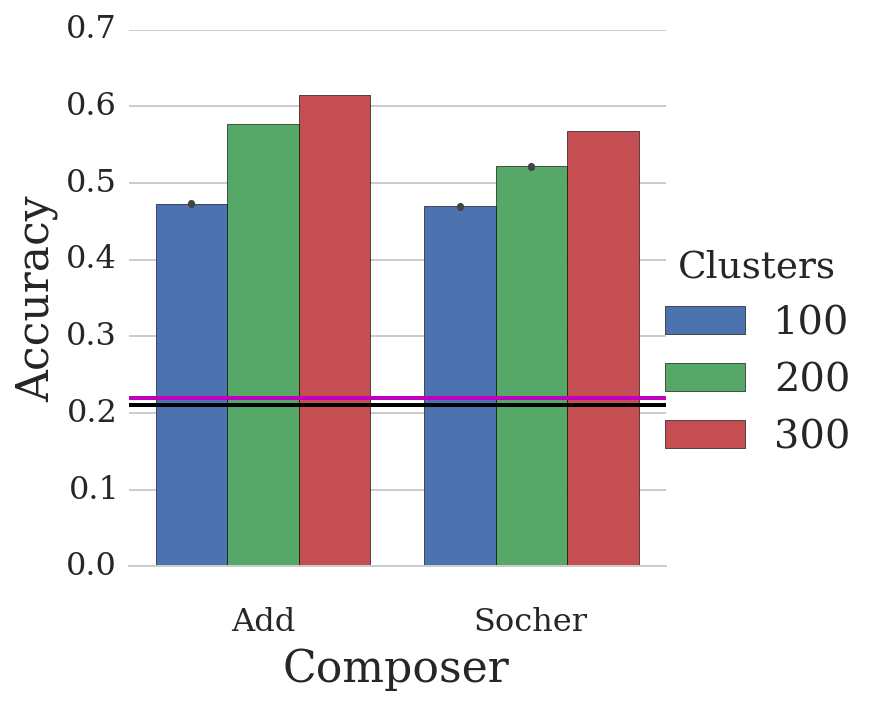

In [6]:
query_dict = {
             'clusters__num_clusters__in': [100, 200, 300],
             'clusters__vectors__algorithm': 'turian',
             'clusters__vectors__composer__in': ['Add', 'Socher'],
             'clusters__vectors__unlabelled': 'turian',
             'clusters__vectors__dimensionality': 100,
             'clusters__vectors__rep': 0,
             'clusters__vectors__unlabelled_percentage': 100,
             'clusters__vectors__use_ppmi': 0,
             'document_features_ev': 'AN+NN',
             'document_features_tr': 'J+N+AN+NN',
             'labelled': 'amazon_grouped-tagged'}
# scores of the same vectors when used to lookup and replace neighbours instead of via clustering
other_dict = {
            'document_features_ev': 'AN+NN',
            'document_features_tr': 'J+N+AN+NN',
            'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
            'expansions__vectors__algorithm': 'turian',
            'expansions__vectors__composer__in': ['Add', 'Socher'],
            'expansions__vectors__dimensionality': 100,
            'expansions__vectors__rep': 0,
            'expansions__vectors__unlabelled': 'turian',
            'expansions__vectors__unlabelled_percentage': 100,
            'expansions__vectors__use_ppmi': 0,
            'labelled': 'amazon_grouped-tagged'}
do_plot(query_dict, other_dict)
plt.savefig('plot-clusters1.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[271, 272, 273, 274, 275, 276]
folds has 3000 values
Accuracy has 3000 values
Composer has 3000 values
Clusters has 3000 values


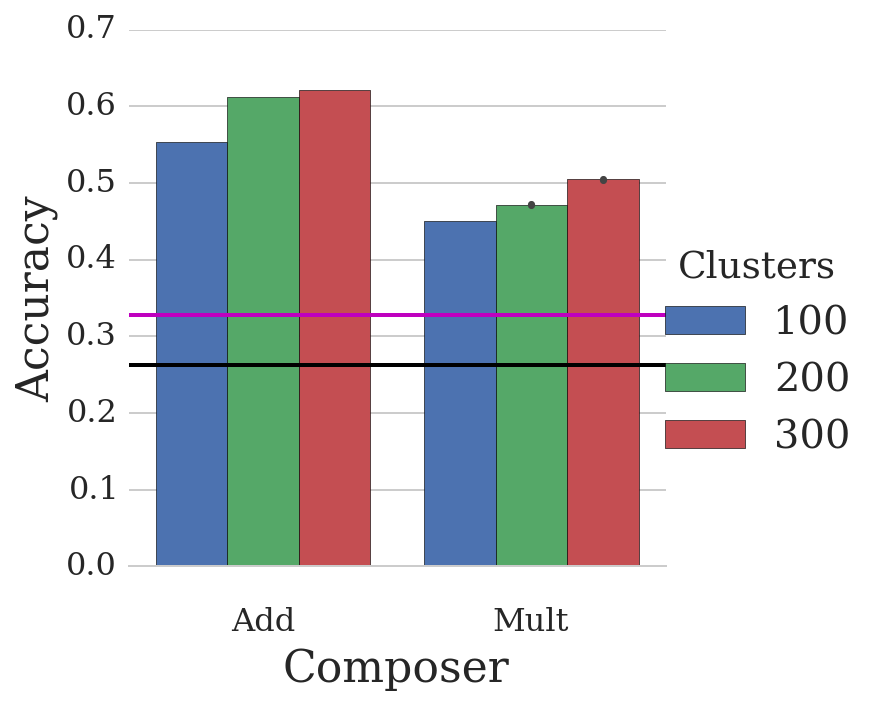

In [7]:
query_dict['clusters__vectors__algorithm'] = 'word2vec'
query_dict['clusters__vectors__composer__in'] = ['Add', 'Mult']
query_dict['clusters__vectors__unlabelled'] = 'gigaw'

other_dict['expansions__vectors__algorithm'] = 'word2vec'
other_dict['expansions__vectors__composer__in'] = ['Add', 'Mult']
other_dict['expansions__vectors__unlabelled'] = 'gigaw'

do_plot(query_dict, other_dict)
plt.savefig('plot-clusters2.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)